# 3D sz's MODEL

- configuration A: (128 x 128 x 64 nodes) 128 CPUS
- configuration B: (256 x 256 x 96 nodes) 256 CPUS
The user should remove visualisation from the python script before running the model on raijin.
In [2]:


In [1]:
import matplotlib.pyplot as plt
import UWGeodynamics as GEO
u = GEO.UnitRegistry # u. +tab to see available units or u = GEO.u
import glucifer

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
##### Characteristic values of the system

half_rate = 1.8 * u.centimeter / u.year # What is it?
model_length = 4000e3 * u.meter
model_width = 2000e3 * u.meter
surfaceTemp = 273.15 * u.degK
baseModelTemp = 3570 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2 # ckeck publi schellart

KL = model_length # Characteristic length
Kt = KL / half_rate # Characteristic time 
KM = bodyforce * KL**2 * Kt**2 # Characteristic mass
KT = (baseModelTemp - surfaceTemp) # Characteristic temperature

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT


In [3]:
Model = GEO.Model(elementRes=(34, 34, 12), 
                  minCoord=(0. * u.kilometer, -0. * u.kilometer, -660. * u.kilometer), 
                  maxCoord=(4000. * u.kilometer, 2000. * u.kilometer, 20. * u.kilometer), 
                  gravity=(0.0 ,0.0, -9.81 * u.meter / u.second**2))

## Output

In [7]:
Model.outputDir="3D_sz_sinus"

## Define Materials
The model has initially 4 materials (air, crust, mantle lithosphere and mantle). We add a fifth material for the sediment. Sediment will only appear if surface processes are turned on...(and if there is sedimentation of course)

In [5]:
## Definition of simple layers


air               = Model.add_material(name="Air", shape=GEO.shapes.Layer3D(top=Model.top, bottom=4.0 * u.kilometer))
stickyAir         = Model.add_material(name="StickyAir", shape=GEO.shapes.Layer3D(top=air.bottom, bottom= 0.0 * u.kilometer))
sedimentMarge     = Model.add_material(name="SedimentMarge", shape=GEO.shapes.Layer3D(top=stickyAir.bottom, bottom= -9.0 * u.kilometer))
#uppercrust        = Model.add_material(name="UppperCrust", shape=GEO.shapes.Layer3D(top=0, bottom=-15.0 * u.kilometer))
#midcrust          = Model.add_material(name="MidCrust", shape=GEO.shapes.Layer3D(top=-15.0 * u.kilometer, bottom=-20.0 * u.kilometer))
#lowercrust        = Model.add_material(name="LowerCrust", shape=GEO.shapes.Layer3D(top=-15.0 * u.kilometer, bottom=-30.0 * u.kilometer))
weakzone          = Model.add_material(name="lithosphere", shape=GEO.shapes.Layer3D(top=-9.0, bottom=-120.0 * u.kilometer))
asthenosphere            = Model.add_material(name="asthenosphere", shape=GEO.shapes.Layer3D(top=weakzone.bottom, bottom=Model.bottom))


In [6]:
## Definition of common geometricals elements

top = GEO.shapes.HalfSpace(normal=(0.,0.,1.), origin=(2000.*u.kilometer,1000.*u.kilometer,-9.*u.kilometer))
right = GEO.shapes.HalfSpace(normal=(1.,0.,0.), origin=(4000.*u.kilometer,1000.*u.kilometer,-330.*u.kilometer))
left = GEO.shapes.HalfSpace(normal=(-1.,0.,0.), origin=(0.*u.kilometer,1000.*u.kilometer,-330.*u.kilometer))
bottom = GEO.shapes.HalfSpace(normal=(0.,0.,-1.), origin=(2000.*u.kilometer,1000.*u.kilometer,-179.*u.kilometer))

slab_before1 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(2600.*u.kilometer,2000.*u.kilometer,-150.*u.kilometer))
slab_before2 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(2563.*u.kilometer,1776.*u.kilometer,-150.*u.kilometer))
slab_before3 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(2458.*u.kilometer,1554.*u.kilometer,-150.*u.kilometer))
slab_before4 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(2298.*u.kilometer,1332.*u.kilometer,-150.*u.kilometer))
slab_before5 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(2103.*u.kilometer,1110.*u.kilometer,-150.*u.kilometer))
slab_before6 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(1895.*u.kilometer,888.*u.kilometer,-150.*u.kilometer))
slab_before7 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(1700.*u.kilometer,666.*u.kilometer,-150.*u.kilometer))
slab_before8 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(1541.*u.kilometer,444.*u.kilometer,-150.*u.kilometer))
slab_before9 = GEO.shapes.HalfSpace(normal=(0.,1.,0.), origin=(1437.*u.kilometer,222.*u.kilometer,-150.*u.kilometer))

slab_after1 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(2563.*u.kilometer,1776.*u.kilometer,-150.*u.kilometer))
slab_after2 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(2458.*u.kilometer,1554.*u.kilometer,-150.*u.kilometer))
slab_after3 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(2298.*u.kilometer,1332.*u.kilometer,-150.*u.kilometer))
slab_after4 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(2103.*u.kilometer,1110.*u.kilometer,-150.*u.kilometer))
slab_after5 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(1895.*u.kilometer,888.*u.kilometer,-150.*u.kilometer))
slab_after6 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(1700.*u.kilometer,666.*u.kilometer,-150.*u.kilometer))
slab_after7 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(1541.*u.kilometer,444.*u.kilometer,-150.*u.kilometer))
slab_after8 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(1437.*u.kilometer,222.*u.kilometer,-150.*u.kilometer))
slab_after9 = GEO.shapes.HalfSpace(normal=(0.,-1.,0.), origin=(1400.*u.kilometer,0.*u.kilometer,-150.*u.kilometer))


## Definition of right plate

right1 = GEO.shapes.HalfSpace(normal=(0.2870,-0.0474,-0.9567), origin=(2576.5*u.kilometer,1888.*u.kilometer,-159.*u.kilometer))
right2 = GEO.shapes.HalfSpace(normal=(0.2847,-0.1347,-0.9491), origin=(2505.5*u.kilometer,1665.*u.kilometer,-159.*u.kilometer))
right3 = GEO.shapes.HalfSpace(normal=(0.2814,-0.2028,-0.9379), origin=(2373.*u.kilometer,1443.*u.kilometer,-159.*u.kilometer))
right4 = GEO.shapes.HalfSpace(normal=(0.2786,-0.2447,-0.9287), origin=(2195.5*u.kilometer,1221.*u.kilometer,-159.*u.kilometer))
right5 = GEO.shapes.HalfSpace(normal=(0.2775,-0.2600,-0.9249), origin=(1994.*u.kilometer,999.*u.kilometer,-159.*u.kilometer))
right6 = GEO.shapes.HalfSpace(normal=(0.2786,-0.2447,-0.9287), origin=(1792.5*u.kilometer,777.*u.kilometer,-159.*u.kilometer))
right7 = GEO.shapes.HalfSpace(normal=(0.2814,-0.2016,-0.9382), origin=(1615.5*u.kilometer,555.*u.kilometer,-159.*u.kilometer))
right8 = GEO.shapes.HalfSpace(normal=(0.2848,-0.1334,-0.9493), origin=(1484.*u.kilometer,333.*u.kilometer,-159.*u.kilometer))
right9 = GEO.shapes.HalfSpace(normal=(0.2827,-0.0478,-0.9567), origin=(1413.5*u.kilometer,111.*u.kilometer,-159.*u.kilometer))


CompositeShape_plate_left1 = right1 & top & left & bottom & slab_before1 & slab_after1
CompositeShape_plate_left2 = right2 & top & left & bottom & slab_before2 & slab_after2
CompositeShape_plate_left3 = right3 & top & left & bottom & slab_before3 & slab_after3
CompositeShape_plate_left4 = right4 & top & left & bottom & slab_before4 & slab_after4
CompositeShape_plate_left5 = right5 & top & left & bottom & slab_before5 & slab_after5
CompositeShape_plate_left6 = right6 & top & left & bottom & slab_before6 & slab_after6
CompositeShape_plate_left7 = right7 & top & left & bottom & slab_before7 & slab_after7
CompositeShape_plate_left8 = right8 & top & left & bottom & slab_before8 & slab_after8
CompositeShape_plate_left9 = right9 & top & left & bottom & slab_before9 & slab_after9

plate_left1 = Model.add_material(name="plate_left1", shape=CompositeShape_plate_left1)
plate_left2 = Model.add_material(name="plate_left2", shape=CompositeShape_plate_left2)
plate_left3 = Model.add_material(name="plate_left3", shape=CompositeShape_plate_left3)
plate_left4 = Model.add_material(name="plate_left4", shape=CompositeShape_plate_left4)
plate_left5 = Model.add_material(name="plate_left5", shape=CompositeShape_plate_left5)
plate_left6 = Model.add_material(name="plate_left6", shape=CompositeShape_plate_left6)
plate_left7 = Model.add_material(name="plate_left7", shape=CompositeShape_plate_left7)
plate_left8 = Model.add_material(name="plate_left8", shape=CompositeShape_plate_left8)
plate_left9 = Model.add_material(name="plate_left9", shape=CompositeShape_plate_left9)

CompositeShape_plate_left = GEO.shapes.MultiShape([CompositeShape_plate_left1, CompositeShape_plate_left2, CompositeShape_plate_left3, CompositeShape_plate_left4, CompositeShape_plate_left5, CompositeShape_plate_left6, CompositeShape_plate_left7, CompositeShape_plate_left8, CompositeShape_plate_left9])
lithosphere = Model.add_material(name="lithosphere", shape = CompositeShape_plate_left)


# Slab part

slableft1 = GEO.shapes.HalfSpace(normal=(-0.2870,0.0474,0.9567), origin=(2581.5*u.kilometer,1888.*u.kilometer,-159.*u.kilometer))
slableft2 = GEO.shapes.HalfSpace(normal=(-0.2847,0.1347,0.9491), origin=(2510.5*u.kilometer,1665.*u.kilometer,-159.*u.kilometer))
slableft3 = GEO.shapes.HalfSpace(normal=(-0.2814,0.2028,0.9379), origin=(2378.*u.kilometer,1443.*u.kilometer,-159.*u.kilometer))
slableft4 = GEO.shapes.HalfSpace(normal=(-0.2786,0.2447,0.9287), origin=(2200.5*u.kilometer,1221.*u.kilometer,-159.*u.kilometer))
slableft5 = GEO.shapes.HalfSpace(normal=(-0.2775,0.2600,0.9249), origin=(1999.*u.kilometer,999.*u.kilometer,-159.*u.kilometer))
slableft6 = GEO.shapes.HalfSpace(normal=(-0.2786,0.2447,0.9287), origin=(1797.5*u.kilometer,777.*u.kilometer,-159.*u.kilometer))
slableft7 = GEO.shapes.HalfSpace(normal=(-0.2814,0.2016,0.9382), origin=(1620.5*u.kilometer,555.*u.kilometer,-159.*u.kilometer))
slableft8 = GEO.shapes.HalfSpace(normal=(-0.2848,0.1334,0.9493), origin=(1489.*u.kilometer,333.*u.kilometer,-159.*u.kilometer))
slableft9 = GEO.shapes.HalfSpace(normal=(-0.2827,0.0478,0.9567), origin=(1418.5*u.kilometer,111.*u.kilometer,-159.*u.kilometer))

topslab = GEO.shapes.HalfSpace(normal=(0.,0.,1.), origin=(2000.*u.kilometer,1000.*u.kilometer,-9.*u.kilometer))
bottomslab = GEO.shapes.HalfSpace(normal=(0.,0.,-1.), origin=(2000.*u.kilometer,1000.*u.kilometer,-179.*u.kilometer))

CompositeShape_slab1 = slableft1 & topslab & slab_before1 & slab_after1 & bottomslab
CompositeShape_slab2 = slableft2 & topslab & slab_before2 & slab_after2 & bottomslab
CompositeShape_slab3 = slableft3 & topslab & slab_before3 & slab_after3 & bottomslab
CompositeShape_slab4 = slableft4 & topslab & slab_before4 & slab_after4 & bottomslab
CompositeShape_slab5 = slableft5 & topslab & slab_before5 & slab_after5 & bottomslab
CompositeShape_slab6 = slableft6 & topslab & slab_before6 & slab_after6 & bottomslab
CompositeShape_slab7 = slableft7 & topslab & slab_before7 & slab_after7 & bottomslab
CompositeShape_slab8 = slableft8 & topslab & slab_before8 & slab_after8 & bottomslab
CompositeShape_slab9 = slableft9 & topslab & slab_before9 & slab_after9 & bottomslab

Slab_lithosphere1 = Model.add_material(name="Slab_lithosphere1", shape=CompositeShape_slab1)
Slab_lithosphere2 = Model.add_material(name="Slab_lithosphere2", shape=CompositeShape_slab2)
Slab_lithosphere3 = Model.add_material(name="Slab_lithosphere3", shape=CompositeShape_slab3)
Slab_lithosphere4 = Model.add_material(name="Slab_lithosphere4", shape=CompositeShape_slab4)
Slab_lithosphere5 = Model.add_material(name="Slab_lithosphere5", shape=CompositeShape_slab5)
Slab_lithosphere6 = Model.add_material(name="Slab_lithosphere6", shape=CompositeShape_slab6)
Slab_lithosphere7 = Model.add_material(name="Slab_lithosphere7", shape=CompositeShape_slab7)
Slab_lithosphere8 = Model.add_material(name="Slab_lithosphere8", shape=CompositeShape_slab8)
Slab_lithosphere9 = Model.add_material(name="Slab_lithosphere9", shape=CompositeShape_slab9)


CompositeShape_slab = GEO.shapes.MultiShape([CompositeShape_slab1, CompositeShape_slab2, CompositeShape_slab3, CompositeShape_slab4, CompositeShape_slab5, CompositeShape_slab6, CompositeShape_slab7, CompositeShape_slab8, CompositeShape_slab9])
Slab_lithosphere = Model.add_material(name="Slab_lithosphere", shape = CompositeShape_slab)


Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)
#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(1200,600))
viewer = Fig.viewer(axis=True)
viewer.window()


<IPython.core.display.Javascript object>


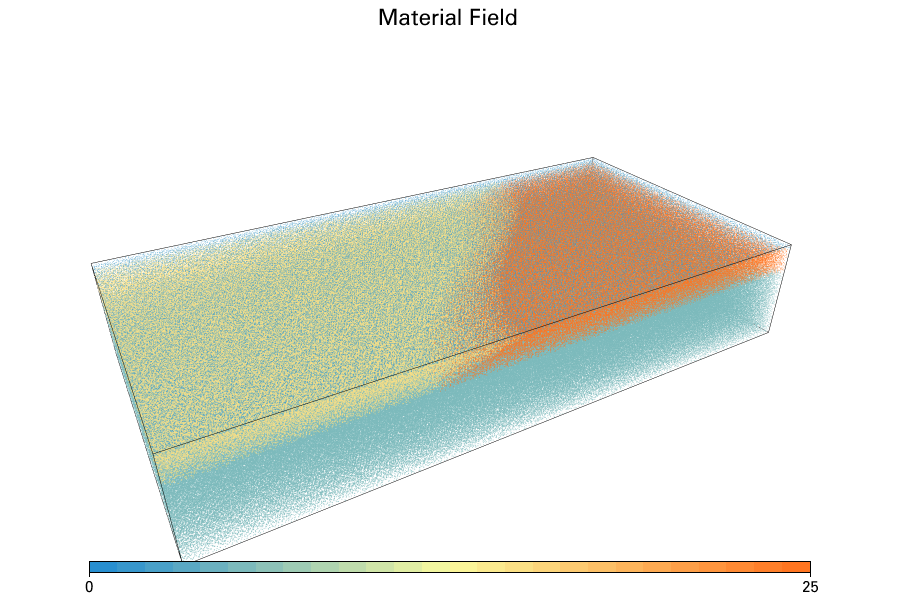

In [8]:
Fig = Model.plot.materialField(script=["rotate z 30", "rotate x -60"], figsize=(900,600))